# **PROYECTO ETL, ENTREGA # 1: EXTRACCIÓN DE DATOS**

Joaquín Andrés Alarcón - 22500236, joaquin.alarcon@uao.edu.co

**Programa:** Maestría en inteligencia artificial y ciencia de datos.

## Importamos librerías

In [1]:
import etl
import kaggle
import pandas as pd
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt
import base64
import numpy as np
from IPython.core.display import display, HTML

C:\Users\incom\AppData\Local\Temp\ipykernel_376\46987705.py:9: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython.display
  from IPython.core.display import display, HTML


# Descripción del dataset
El archivo powerconsumption.csv corresponde a los datos de consumo de energía de una ciudad al norte de Marruecos. Su comportamiento climático es templado y lluvioso en invierto, así como caluroso y seco en verano. Los datos se obtuvieron desde el sistema SCADA de Amendis (La oficina nacional de electricidad y agua potable).
La red de distribución está soportada por 3 estaciones: Quads, Smir y Boussafou.

## Usamos la función desarrollada para automatizar el ETL, en este caso subre la extracción y almacenamiento en área de staging

In [2]:
kaggle.api.dataset_download_files("fedesoriano/electric-power-consumption", unzip=True)
file_input = etl.extraer_a_staging()

Dataset URL: https://www.kaggle.com/datasets/fedesoriano/electric-power-consumption
Conexión exitosa
Base de datos 'project1_db' creada exitosamente.
Datos cargados en la base de datos exitosamente.
Dataset almacenado en área de staging existosamente
               datetime  temperature  humidity  wind_speed  \
0         1/1/2017 0:00        6.559      73.8       0.083   
1         1/1/2017 0:10        6.414      74.5       0.083   
2         1/1/2017 0:20        6.313      74.5       0.080   
3         1/1/2017 0:30        6.121      75.0       0.083   
4         1/1/2017 0:40        5.921      75.7       0.081   
...                 ...          ...       ...         ...   
52411  12/30/2017 23:10        7.010      72.4       0.080   
52412  12/30/2017 23:20        6.947      72.6       0.082   
52413  12/30/2017 23:30        6.900      72.8       0.086   
52414  12/30/2017 23:40        6.758      73.0       0.080   
52415  12/30/2017 23:50        6.580      74.1       0.081   

    

## Iniciamos el análisis exploratorio de los datos (EDA)

In [4]:
# Veamos el encabezado del dataset
file_input.head(10)

,datetime,temperature,humidity,wind_speed,general_diffuse_flows,diffuse_flows,power_consumption_zone1,power_consumption_zone2,power_consumption_zone3
0,1/1/2017 0:00,6.559,73.8,0.083,0.051,0.119,34055.69620,16128.87538,20240.96386
1,1/1/2017 0:10,6.414,74.5,0.083,0.070,0.085,29814.68354,19375.07599,20131.08434
2,1/1/2017 0:20,6.313,74.5,0.080,0.062,0.100,29128.10127,19006.68693,19668.43373
3,1/1/2017 0:30,6.121,75.0,0.083,0.091,0.096,28228.86076,18361.09422,18899.27711
4,1/1/2017 0:40,5.921,75.7,0.081,0.048,0.085,27335.69620,17872.34043,18442.40964
5,1/1/2017 0:50,5.853,76.9,0.081,0.059,0.108,26624.81013,17416.41337,18130.12048
6,1/1/2017 1:00,5.641,77.7,0.080,0.048,0.096,25998.98734,16993.31307,17945.06024
7,1/1/2017 1:10,5.496,78.2,0.085,0.055,0.093,25446.07595,16661.39818,17459.27711
8,1/1/2017 1:20,5.678,78.1,0.081,0.066,0.141,24777.72152,16227.35562,17025.54217
9,1/1/2017 1:30,5.491,77.3,0.082,0.062,0.111,24279.49367,15939.20973,16794.21687


En total se tienen 52.416 mediciones de consumo y variables ambientales, con una ventana de muestreo de 10 minutos.
Las 9 columnas del dataset corresponden a:


*   Datetime: Ventana de tiempo de diez minutos.
*   Temperature: Temperatura ambiente.
*   Humidity: Humedad relativa.
*   WinSpeed: Velocidad del viento.
*   GeneralDiffuseFlows: Flujos difusos de calor o energía en el entorno.
*   DiffuseFlows: Fluidos de baja tempertura (<0.2 a ~ 100 °C) que se descargan lentamente a través de montículos de sulfuro, flujos de lava fracturados y conjuntos de tapetes bacterianos y macrofauna.
*   PowerConsumption_Zone1, PowerConsumption_Zone2 y PowerConsumption_Zone3: Consumo medido en cada una de las zonas (Quads, Smir y Boussafou)

In [5]:
file_input.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52416 entries, 0 to 52415
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   datetime                 52416 non-null  object 
 1   temperature              52416 non-null  float64
 2   humidity                 52416 non-null  float64
 3   wind_speed               52416 non-null  float64
 4   general_diffuse_flows    52416 non-null  float64
 5   diffuse_flows            52416 non-null  float64
 6   power_consumption_zone1  52416 non-null  float64
 7   power_consumption_zone2  52416 non-null  float64
 8   power_consumption_zone3  52416 non-null  float64
dtypes: float64(8), object(1)
memory usage: 3.6+ MB


Con el resumen del tipo de datos del dataset se puede concluir que todas las celdas contienen información, además de que la única variable tipo object corresponde a la fecha, la cual permite definir una secuencia de los datos y facilita la implementación de algoritmos de predicción. Las demás variables son numéricas.

datetime                   0
temperature                0
humidity                   0
wind_speed                 0
general_diffuse_flows      0
diffuse_flows              0
power_consumption_zone1    0
power_consumption_zone2    0
power_consumption_zone3    0
dtype: int64


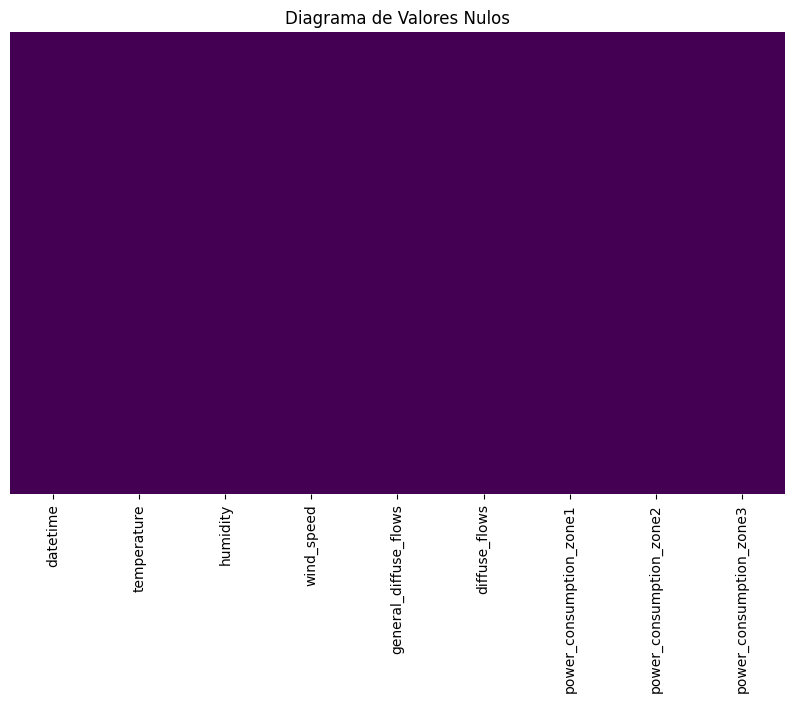

In [6]:
# Vamos a validar que no hay valores nulos
print(file_input.isnull().sum())
plt.figure(figsize=(10, 6))
sns.heatmap(file_input.isnull(), cmap="viridis", cbar=False, yticklabels=False)
plt.title("Diagrama de Valores Nulos")
plt.show()

En la sección anterior revisamos y corroboramos de que no hay datos nulos.

In [8]:
file_input.describe(include='all')

,datetime,temperature,humidity,wind_speed,general_diffuse_flows,diffuse_flows,power_consumption_zone1,power_consumption_zone2,power_consumption_zone3
count,52416,52416.000000,52416.000000,52416.000000,52416.000000,52416.000000,52416.000000,52416.000000,52416.000000
unique,52416,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,12/30/2017 21:10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,18.810024,68.259518,1.959489,182.696614,75.028022,32344.970564,21042.509082,17835.406218
std,NaN,5.815476,15.551177,2.348862,264.400960,124.210949,7130.562564,5201.465892,6622.165099
min,NaN,3.247000,11.340000,0.050000,0.004000,0.011000,13895.696200,8560.081466,5935.174070
25%,NaN,14.410000,58.310000,0.078000,0.062000,0.122000,26310.668692,16980.766032,13129.326630
50%,NaN,18.780000,69.860000,0.086000,5.035500,4.456000,32265.920340,20823.168405,16415.117470
75%,NaN,22.890000,81.400000,4.915000,319.600000,101.000000,37309.018185,24713.717520,21624.100420


Al realizar un análisis descritivo, la distribución de los datos en general parece tener un comportamiento uniforme, salvo la velocidad del viento y los flujos difusos.

In [9]:
duplicate_rows_df = file_input[file_input.duplicated()]
print("number of duplicate rows: ", duplicate_rows_df.shape)

number of duplicate rows:  (0, 9)


Validamos que no hay datos duplicados en el dataset.

## Visualización de histograma de los datos

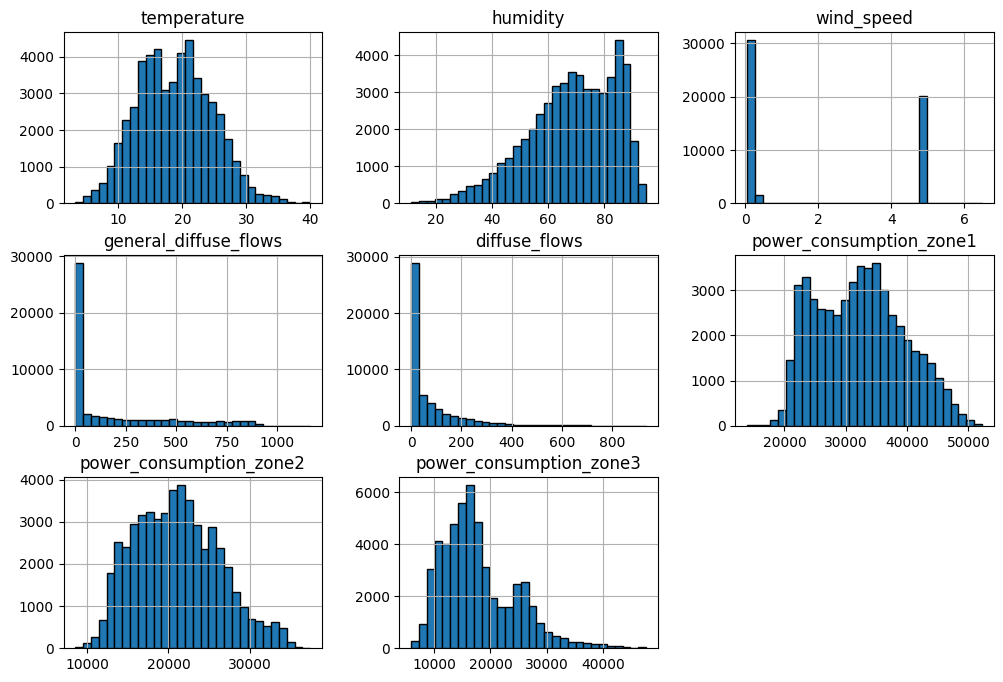

In [8]:
file_input.hist(figsize=(12, 8), bins=30, edgecolor="black")
plt.show()

Al visualizar los datos corroboramos la tendencia de los datos descrita anteriormente, no hay datos perdidos, los outliers parecen estar dentro del rango posible de datos normales.
Para validar con más detalle los datos atípicos se presentarán diagramas de cajas para cada variable.

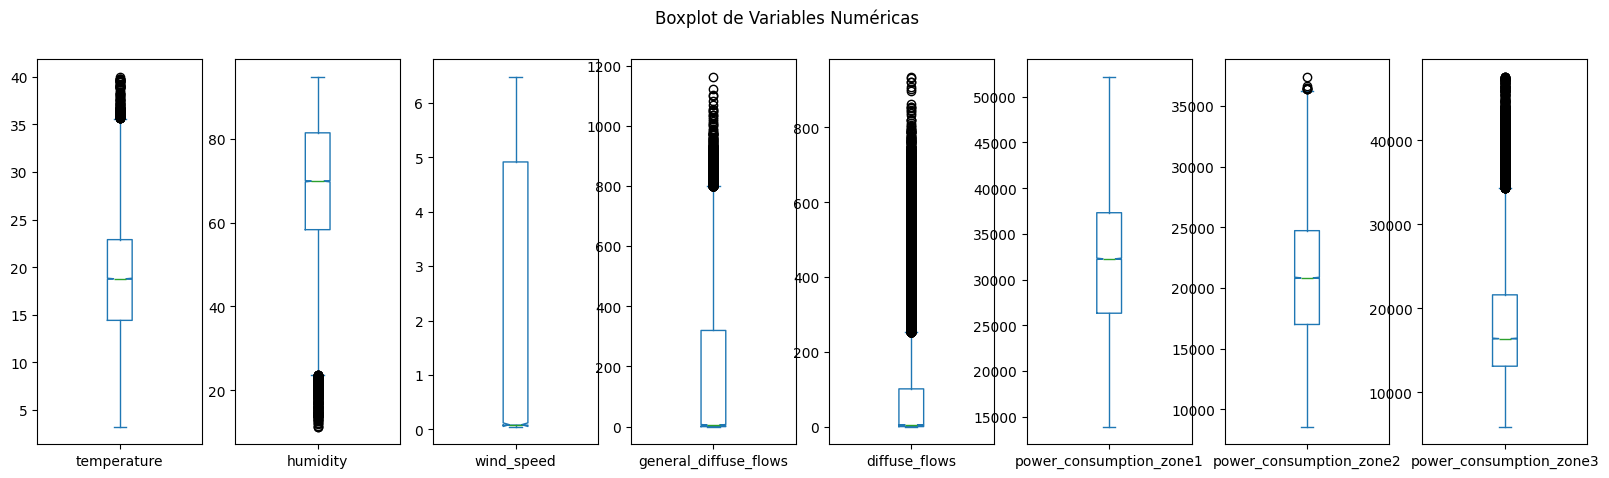

In [10]:
# Boxplot de cada variable numérica
file_input.plot(kind="box", subplots=True, layout=(1, len(file_input.select_dtypes(include=['number']).columns)),
        figsize=(20, 5), vert=True, notch=True)
plt.suptitle("Boxplot de Variables Numéricas")
plt.show()

En algunas variables se presentan datos por fuera de los vigotes del diagrama de cajas, en un análisis más detallado se podría revisar la posibilidad de eliminar algunos de estos valores.

Finalmente contruimos una matriz de correlación entre las variables numéricas, de las cuales podemos concluir información relevante:
- Las variables de potencia consumida tienen alta relación entre ellas, se podría realizar un análisis general sumando las 3 variables para construir una sol. También se podría analizar tomando cada consumo de zona como variable de salida y descartar las otras dos.
- Las variables ambientales de humedad y temperatura tienen una correlación media, al igual que la temperatura y velocidad del viento.
- Los flujos difusos se correlacionan entre si, pues finalmente son la misma variable general y acotada. La general tiene una correlación media con la temperatura y humedad.

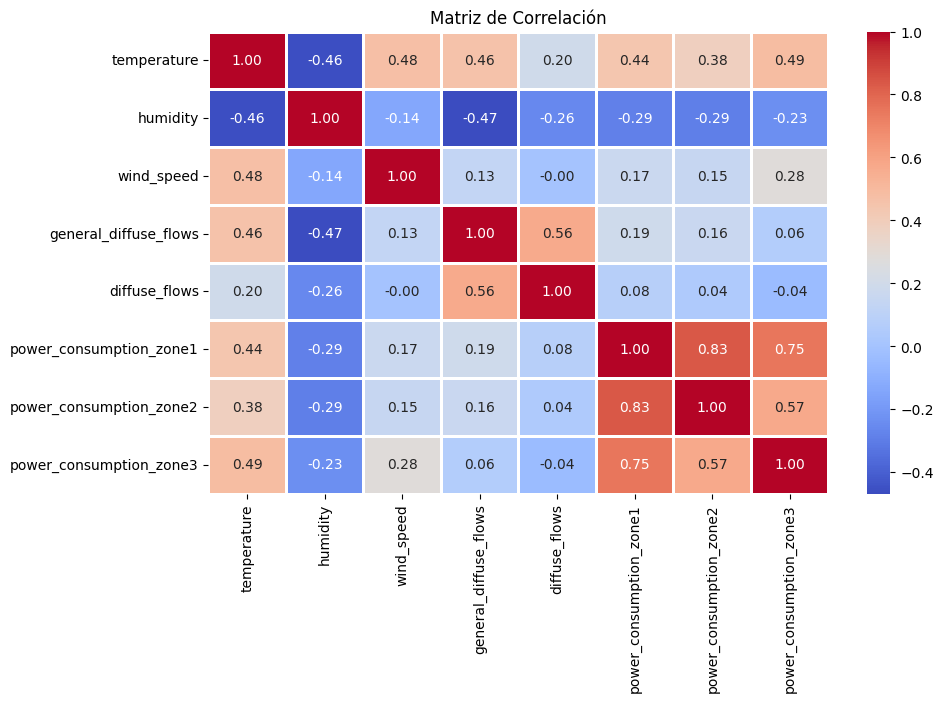

In [12]:
plt.figure(figsize=(10, 6))
sns.heatmap(file_input.select_dtypes(include=np.number).corr(), annot=True, cmap="coolwarm", fmt=".2f", linewidths=1)
plt.title("Matriz de Correlación")
plt.show()

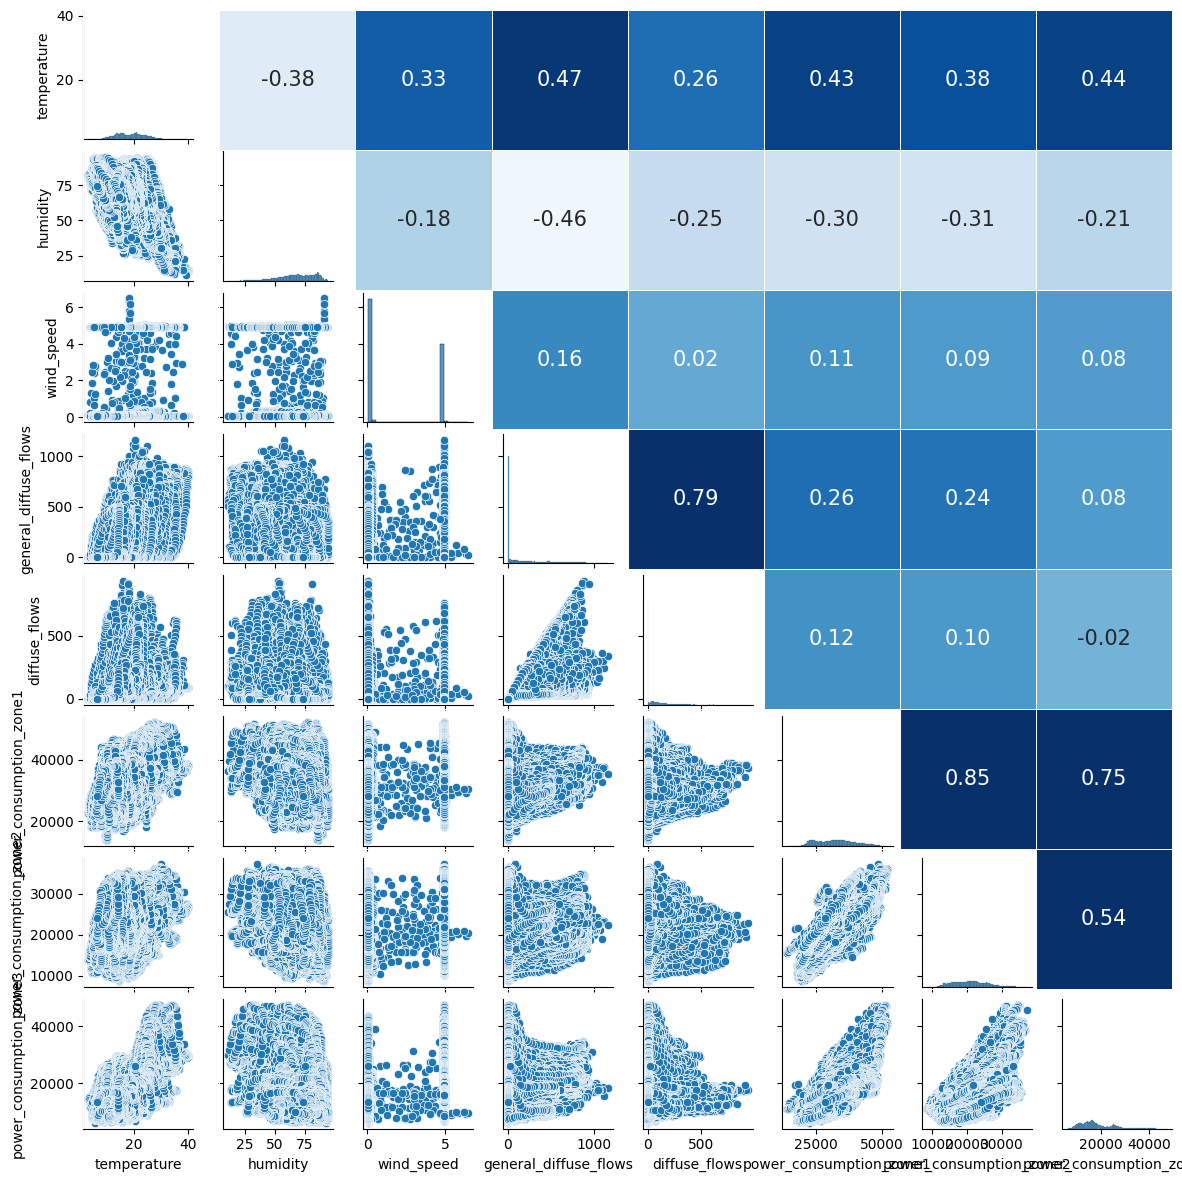

In [13]:
def hide_axis(*args, **kwds):
    plt.gca().set_visible(False)

correlacion = file_input.select_dtypes(include=np.number).corr(method="spearman")
CorrPair = sns.pairplot(file_input.select_dtypes(include=np.number), height=1.5)
CorrPair.map_upper(hide_axis)

(xmin, _), (_, ymax) = CorrPair.axes[0, 0].get_position().get_points()
(_, ymin), (xmax, _) = CorrPair.axes[-1, -1].get_position().get_points()

ax = CorrPair.fig.add_axes([xmin, ymin, xmax - xmin, ymax - ymin], facecolor='none')

mask1 = np.tril(np.ones_like(correlacion, dtype=bool))
sns.heatmap(correlacion, mask=mask1,
            cmap='Blues', vmax=.5, vmin=-.5, fmt=".2f",
            linewidths=.5, cbar=False, annot=True, annot_kws={'size': 15}, ax=ax)
ax.set_xticks([])
ax.set_yticks([])

plt.show()

Esta última gráfica combina la matríz de correlación con una gráfica entre variables, que permite visualizar tendencias y evidenciar más fácilmente las correlaciones entre ellas.

La velocidad del viento tiene 2 valor altamente dominantes, podría deberse a saturación del sensor, sin embargo los outlaiers dan a entender de que pueden haber más valores por encima del máximo dominante.

Las demás correlaciones descritas en el paso anterior se validan visualmente, aunque no son totalmente lineales, facilitarían un posible procesamiento de reducción de dimensionalidad para predecir las potencias de consumo de cada zona.